In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from datetime import datetime
#from prophet import Prophet

pd.options.display.max_columns = None

In [ ]:
dataVelocidadComplete = pd.read_csv('/content/drive/MyDrive/Maestría/Datos/Simplified/complete_data_2020.csv')
dataVelocidadComplete=dataVelocidadComplete.drop(columns=['Unnamed: 0'])
dataVelocidadComplete =dataVelocidadComplete.drop_duplicates()
dataVelocidadComplete.head()

,INICIO_FRANJA,AÑO,VEL_PROMEDIO,VEL_PONDERADA,VEL_MEDIA_PONDERADA,DIA,MES,FRANJA,INICIO,CONTROL,SHAPE.LEN
0,2020-01-01 00:00:00,2020.0,35.999663,35.209814,35.209814,1.0,1.0,MADRUGADA,NaN,NaN,NaN
1,2020-01-01 06:00:00,2020.0,31.052914,31.052914,31.052914,1.0,1.0,MAÑANA,NaN,NaN,NaN
2,2020-01-01 12:00:00,2020.0,30.161591,30.161591,30.161591,1.0,1.0,TARDE,NaN,NaN,NaN
3,2020-01-01 18:00:00,2020.0,30.673586,30.125589,30.125589,1.0,1.0,NOCHE,NaN,NaN,NaN
4,2020-01-02 00:00:00,2020.0,35.698508,35.698508,35.698508,2.0,1.0,MADRUGADA,NaN,NaN,NaN


In [ ]:
dataVelocidadComplete['INICIO_FRANJA'] = pd.to_datetime(dataVelocidadComplete['INICIO_FRANJA'])
dataVelocidadComplete.index=dataVelocidadComplete['INICIO_FRANJA']
dataVelocidadComplete.head()
dataVelocidadComplete =dataVelocidadComplete.drop(columns=['INICIO','CONTROL','SHAPE.LEN','VEL_PONDERADA','VEL_MEDIA_PONDERADA','INICIO_FRANJA'])

In [ ]:
dataVelocidadComplete['AÑO']=2020
dataVelocidadComplete.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1126 entries, 2020-01-01 00:00:00 to 2020-12-30 18:00:00
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AÑO           1126 non-null   int64  
 1   VEL_PROMEDIO  1126 non-null   float64
 2   DIA           1126 non-null   float64
 3   MES           1126 non-null   float64
 4   FRANJA        1126 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 52.8+ KB


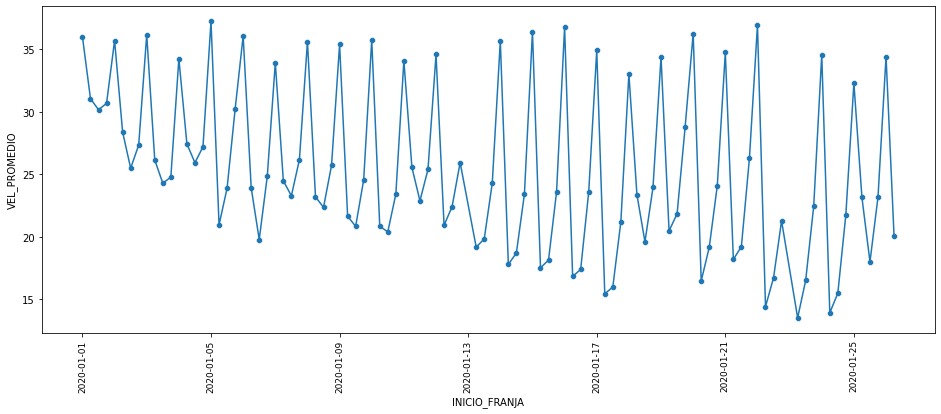

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dataVelocidadComplete = dataVelocidadComplete.sort_index()
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90, fontsize=9)
sns.scatterplot(x=dataVelocidadComplete[0:100].index,y=dataVelocidadComplete[0:100].VEL_PROMEDIO)
sns.lineplot(x=dataVelocidadComplete[0:100].index,y=dataVelocidadComplete[0:100].VEL_PROMEDIO)

No handles with labels found to put in legend.


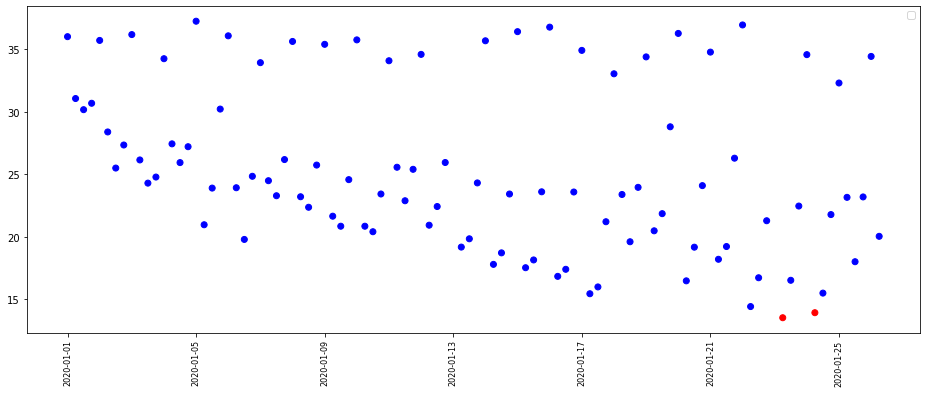

In [ ]:
import matplotlib as pl
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
seriesVelocidad = dataVelocidadComplete
outliers_fraction = 0.02
dataVelocidad = seriesVelocidad[['VEL_PROMEDIO']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(dataVelocidad)
dataScaledVelocidad = pd.DataFrame(dataVelocidad)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(dataScaledVelocidad)
anomalyResultsVelocidad = pd.Series(model.predict(dataScaledVelocidad))
# visualization
fig, ax = pl.pyplot.subplots(figsize=(16,6))
seriesVelocidad['anomaly2']=np.zeros(len(seriesVelocidad))
plt.xticks(rotation=90, fontsize=8)
for i in range (0,len(anomalyResultsVelocidad)):
  seriesVelocidad.loc[seriesVelocidad.index[i],'anomaly2']= anomalyResultsVelocidad[i]
colors = {1:'blue', -1:'red'}
ax.scatter(seriesVelocidad[:100].index, seriesVelocidad[:100]['VEL_PROMEDIO'], c=seriesVelocidad[:100]["anomaly2"].apply(lambda x: colors[x]))

pl.pyplot.legend()
pl.pyplot.show();
DataUsingIsolationForestVelocidad = seriesVelocidad.copy()

In [ ]:
dataVelocidadComplete=dataVelocidadComplete.drop_duplicates()

dataVelocidadComplete.head()

,AÑO,VEL_PROMEDIO,DIA,MES,FRANJA,anomaly2
INICIO_FRANJA,,,,,,
2020-01-01 00:00:00,2020,35.999663,1.0,1.0,MADRUGADA,1.0
2020-01-01 06:00:00,2020,31.052914,1.0,1.0,MAÑANA,1.0
2020-01-01 12:00:00,2020,30.161591,1.0,1.0,TARDE,1.0
2020-01-01 18:00:00,2020,30.673586,1.0,1.0,NOCHE,1.0
2020-01-02 00:00:00,2020,35.698508,2.0,1.0,MADRUGADA,1.0


In [ ]:
for i in dataVelocidadComplete.index:
  if dataVelocidadComplete.loc[i,'anomaly2'].all()==-1:
    dataVelocidadComplete.loc[i,'VEL_PROMEDIO']= dataVelocidadComplete['VEL_PROMEDIO'].mean()


No handles with labels found to put in legend.


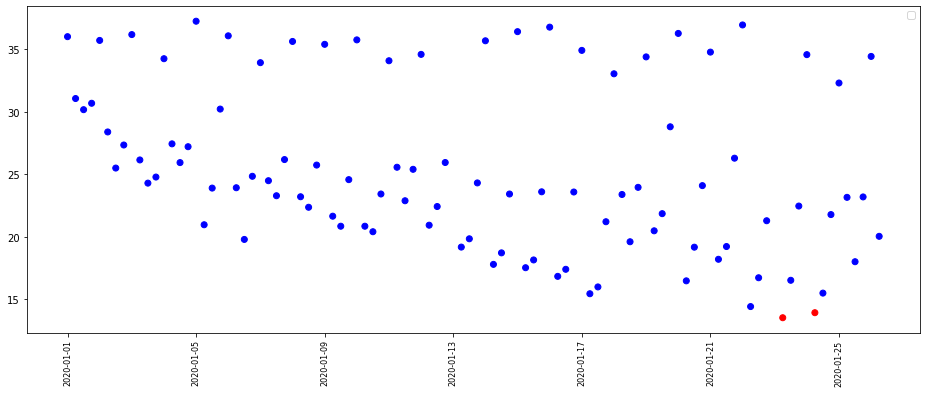

In [ ]:
fig, ax = pl.pyplot.subplots(figsize=(16,6))
plt.xticks(rotation=90, fontsize=8)
colors = {1:'blue', -1:'red'}
ax.scatter(dataVelocidadComplete[:100].index, dataVelocidadComplete[:100]['VEL_PROMEDIO'], c=dataVelocidadComplete[:100]["anomaly2"].apply(lambda x: colors[x]))

pl.pyplot.legend()
pl.pyplot.show();

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
_categorical_columns=dataVelocidadComplete.select_dtypes("object").columns
for i in _categorical_columns:
    dataVelocidadComplete[i]=labelencoder.fit_transform(dataVelocidadComplete[i])
dataVelocidadComplete.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,AÑO,VEL_PROMEDIO,DIA,MES,FRANJA,anomaly2
INICIO_FRANJA,,,,,,
2020-01-01 00:00:00,2020,35.999663,1.0,1.0,0,1.0
2020-01-01 06:00:00,2020,31.052914,1.0,1.0,1,1.0
2020-01-01 12:00:00,2020,30.161591,1.0,1.0,3,1.0
2020-01-01 18:00:00,2020,30.673586,1.0,1.0,2,1.0
2020-01-02 00:00:00,2020,35.698508,2.0,1.0,0,1.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
dataVelocidadComplete['AÑO']=dataVelocidadComplete['AÑO'].fillna(2020)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
"""labelencoder = LabelEncoder()
_categorical_columns=dataVelocidadComplete.select_dtypes("object").columns
for i in _categorical_columns:
    dataVelocidadComplete[i]=labelencoder.fit_transform(dataVelocidadComplete[i])"""

'labelencoder = LabelEncoder()\n_categorical_columns=dataVelocidadComplete.select_dtypes("object").columns\nfor i in _categorical_columns:\n    dataVelocidadComplete[i]=labelencoder.fit_transform(dataVelocidadComplete[i])'

In [ ]:
training_regressor = DecisionTreeRegressor(random_state=1)
x_train,x_test,y_train,y_test = train_test_split(dataVelocidadComplete.drop(columns=['VEL_PROMEDIO','anomaly2']),dataVelocidadComplete.VEL_PROMEDIO,test_size = 0.30 ,random_state = 2)
training_regressor_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_training_regressor = GridSearchCV(training_regressor,training_regressor_params,cv=3)
gs_training_regressor.fit(x_train,y_train)
a = gs_training_regressor.best_params_
print(a)
training_regressor.fit(x_train,y_train)

{'max_depth': 9, 'min_samples_leaf': 14}


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
predictions = gs_training_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

msle=mean_squared_log_error(predictions,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle,' MSLE:',mean_squared_log_error) # For decision tree

print('MAE:',mean_absolute_error(predictions,y_test))
print('MSE:',mean_squared_error(predictions,y_test))
print('RMSE:',np.sqrt(mean_squared_error(predictions,y_test)))

RMLSE for the data: 0.10077719471575007  MSLE: <function mean_squared_log_error at 0x7f60c50c3170>
MAE: 1.8024575467081163
MSE: 5.796513155684364
RMSE: 2.4075948902762616


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
training_model=rf.fit(x_train, y_train)
predictions_rf = rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

msle=mean_squared_log_error(predictions_rf,y_test)
rmsle=np.sqrt(msle)

print('MAE:',mean_absolute_error(predictions_rf,y_test))
print('MSE:',mean_squared_error(predictions_rf,y_test))
print('RMSE:',np.sqrt(mean_squared_error(predictions_rf,y_test)))

MAE: 1.5687606719400584
MSE: 4.566585793697302
RMSE: 2.1369571342676257


In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.0001, 0.00001],
        'alpha': [3, 4, 5,10],
        }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import KFold
data_dmatrix = xgb.DMatrix(data=dataVelocidadComplete.drop(columns=['VEL_PROMEDIO']),label=dataVelocidadComplete.VEL_PROMEDIO)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror' ,n_estimators = 1500,eval_metric="rmse")
dataVelocidadComplete.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1123 entries, 2020-01-01 00:00:00 to 2020-12-30 18:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AÑO           1123 non-null   int64  
 1   VEL_PROMEDIO  1123 non-null   float64
 2   DIA           1123 non-null   float64
 3   MES           1123 non-null   float64
 4   FRANJA        1123 non-null   int64  
 5   anomaly2      1123 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 101.4 KB


In [ ]:
folds = 3
param_comb = 5
skf = KFold(n_splits=folds, shuffle = True, random_state = 1001)
grid = GridSearchCV(estimator=xg_reg, param_grid=params, scoring='r2', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3 )
grid.fit(x_train,y_train)
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
results.to_csv('/content/drive/MyDrive/Maestría/Datos/xgb-grid-search-speed.csv', index=False)

"folds = 3\nparam_comb = 5\nskf = KFold(n_splits=folds, shuffle = True, random_state = 1001)\ngrid = GridSearchCV(estimator=xg_reg, param_grid=params, scoring='r2', n_jobs=8, cv=skf.split(x_train,y_train), verbose=3 )\ngrid.fit(x_train,y_train)\nprint('\n All results:')\nprint(grid.cv_results_)\nprint('\n Best estimator:')\nprint(grid.best_estimator_)\nprint('\n Best score:')\nprint(grid.best_score_ * 2 - 1)\nprint('\n Best parameters:')\nprint(grid.best_params_)\nresults = pd.DataFrame(grid.cv_results_)\nresults.to_csv('/content/drive/MyDrive/Maestría/Datos/xgb-grid-search-speed.csv', index=False)"

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror' ,n_estimators = 1500,eval_metric="rmse",alpha= 3, colsample_bytree= 1.0, gamma= 5, learning_rate= 0.01, max_depth= 5, min_child_weight= 1, subsample= 0.8)
xg_reg.fit(x_train,y_train)
preds_xg = xg_reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

msle=mean_squared_log_error(predictions_rf,y_test)
rmsle=np.sqrt(msle)

print('MAE:',mean_absolute_error(preds_xg,y_test))
print('MSE:',mean_squared_error(preds_xg,y_test))
print('RMSE:',np.sqrt(mean_squared_error(preds_xg,y_test)))

MAE: 1.583743024589026
MSE: 4.360178201579295
RMSE: 2.088103972885281


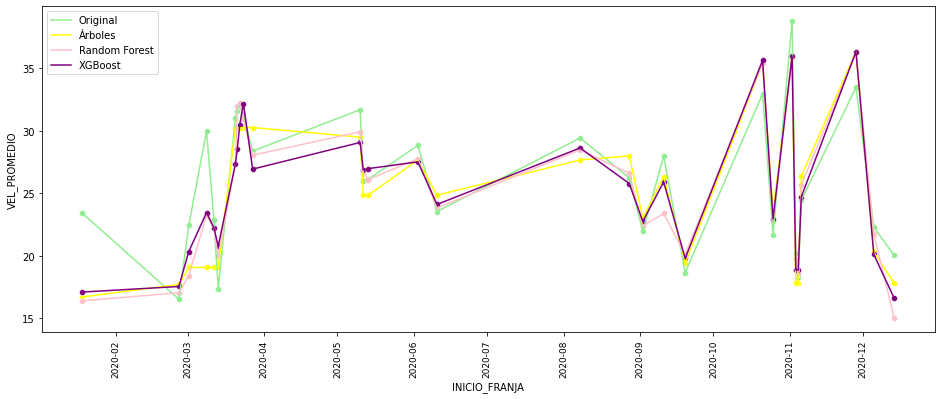

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90, fontsize=9)
sns.scatterplot(x=x_test[0:30].index,y=y_test[0:30],color='lightgreen',legend='auto')
sns.scatterplot(x=x_test[0:30].index,y=predictions[0:30],color='yellow',legend='auto')
sns.scatterplot(x=x_test[0:30].index,y=predictions_rf[0:30],color='pink',legend='auto')
sns.scatterplot(x=x_test[0:30].index,y=preds_xg[0:30],color='purple',legend='auto')
sns.lineplot(x=x_test[0:30].index,y=y_test[0:30],color='lightgreen',legend='auto',label='Original')
sns.lineplot(x=x_test[0:30].index,y=predictions[0:30],color='yellow',legend='auto',label='Árboles')
sns.lineplot(x=x_test[0:30].index,y=predictions_rf[0:30],color='pink',legend='auto',label='Random Forest')
sns.lineplot(x=x_test[0:30].index,y=preds_xg[0:30],color='purple',legend='auto',label='XGBoost')

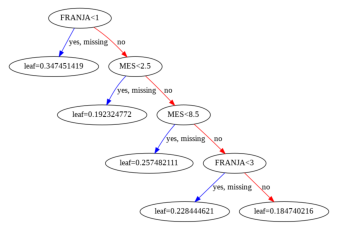

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [60, 20]
plt.savefig('/content/drive/MyDrive/Maestría/Datos/treeXGBoostSpeed.png')

# Dataset Sintético

In [ ]:
dataList = []
FRANJAS = ["MADRUGADA","MAÑANA","TARDE","NOCHE"]
HORAS = ["00:00:00","06:00:00","12:00:00","18:00:00"]
YEAR_SYNTH =2021
MONTH_SYNTH =1
for DAY_SYNTH in range(1,8):
  for i in range(0,4):
    franja =FRANJAS[i]
    franjaHora =HORAS[i]
    inicioFranja=datetime.fromisoformat(f'{YEAR_SYNTH}-{MONTH_SYNTH if MONTH_SYNTH>9 else ("0"+str(MONTH_SYNTH))}-{DAY_SYNTH if DAY_SYNTH>9 else ("0"+str(DAY_SYNTH))}T{franjaHora}')
    dataList.append({"INICIO_FRANJA":inicioFranja,"AÑO":YEAR_SYNTH,"VEL_PROMEDIO":0,"DIA":DAY_SYNTH,"MES":MONTH_SYNTH,"FRANJA":franja})

mock_dataset = pd.DataFrame(dataList)
mock_dataset=mock_dataset.set_index('INICIO_FRANJA')
mock_dataset.head()
print(mock_dataset.index)

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 06:00:00',
               '2021-01-01 12:00:00', '2021-01-01 18:00:00',
               '2021-01-02 00:00:00', '2021-01-02 06:00:00',
               '2021-01-02 12:00:00', '2021-01-02 18:00:00',
               '2021-01-03 00:00:00', '2021-01-03 06:00:00',
               '2021-01-03 12:00:00', '2021-01-03 18:00:00',
               '2021-01-04 00:00:00', '2021-01-04 06:00:00',
               '2021-01-04 12:00:00', '2021-01-04 18:00:00',
               '2021-01-05 00:00:00', '2021-01-05 06:00:00',
               '2021-01-05 12:00:00', '2021-01-05 18:00:00',
               '2021-01-06 00:00:00', '2021-01-06 06:00:00',
               '2021-01-06 12:00:00', '2021-01-06 18:00:00',
               '2021-01-07 00:00:00', '2021-01-07 06:00:00',
               '2021-01-07 12:00:00', '2021-01-07 18:00:00'],
              dtype='datetime64[ns]', name='INICIO_FRANJA', freq=None)


In [ ]:
dataVelocidadComplete=dataVelocidadComplete.drop(columns=['anomaly2'])
labelencoder = LabelEncoder()
_categorical_columns=mock_dataset.select_dtypes("object").columns
for i in _categorical_columns:
    mock_dataset[i]=labelencoder.fit_transform(mock_dataset[i])
predictions_mock = rf.predict(mock_dataset.drop(columns=['VEL_PROMEDIO']))
print(predictions_mock )

[35.26265275 28.81652707 28.70021403 29.68754191 35.96940885 27.54934296
 26.15385702 27.56569788 35.95624503 26.09913625 24.46349924 25.82497361
 34.98289978 26.49333908 25.19643039 26.26445692 36.2665854  23.2151179
 24.55239975 28.15583183 36.10438897 23.51169584 21.27520153 25.78996595
 34.84818787 24.15651994 22.4086682  25.80672976]


In [ ]:
dataComparisson = pd.read_csv('/content/drive/MyDrive/Maestría/Datos/Simplified/2021-1.csv')
dataComparisson.index = dataComparisson['INICIO_FRANJA']
dataComparisson = dataComparisson.sort_index()
dataComparisson.head()

,INICIO_FRANJA,INICIO,AÑO,VEL_PROMEDIO,CONTROL,SHAPE.LEN,DIA,MES,FRANJA
INICIO_FRANJA,,,,,,,,,
2021-01-01 00:00:00,2021-01-01 00:00:00,1.609470e+12,2021.0,36.244748,35.761549,0.13004,1.0,1.0,MADRUGADA
2021-01-01 06:00:00,2021-01-01 06:00:00,1.609491e+12,2021.0,29.547635,29.547635,0.13004,1.0,1.0,MAÑANA
2021-01-01 12:00:00,2021-01-01 12:00:00,1.609513e+12,2021.0,30.203060,30.196866,0.13004,1.0,1.0,TARDE
2021-01-01 18:00:00,2021-01-01 18:00:00,1.609534e+12,2021.0,30.058101,30.056277,0.13004,1.0,1.0,NOCHE
2021-01-02 00:00:00,2021-01-02 00:00:00,1.609555e+12,2021.0,37.564565,37.564565,0.13004,2.0,1.0,MADRUGADA


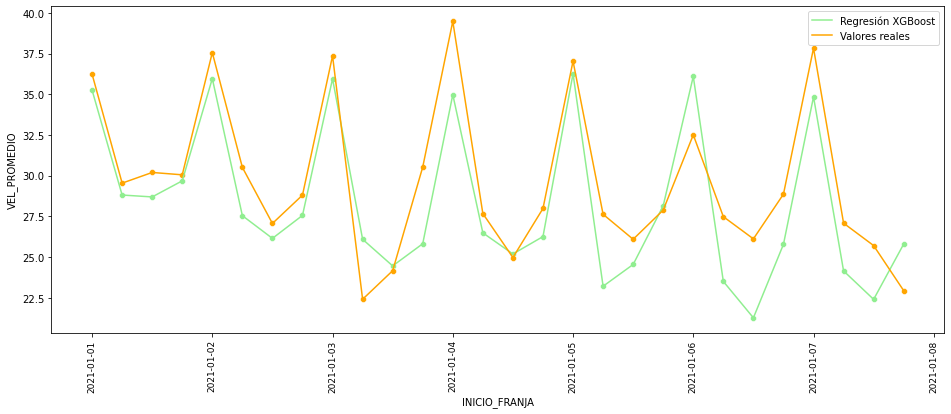

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90, fontsize=9)
sns.scatterplot(x=mock_dataset.index,y=predictions_mock,color='lightgreen',legend='auto')
sns.lineplot(x=mock_dataset.index,y=predictions_mock,color='lightgreen',legend='auto',label='Regresión XGBoost')
sns.scatterplot(x=mock_dataset.index,y=dataComparisson['VEL_PROMEDIO'][0:28],color='orange',legend='auto')
sns.lineplot(x=mock_dataset.index,y=dataComparisson['VEL_PROMEDIO'][0:28],color='orange',legend='auto',label='Valores reales')

In [ ]:
print('MAE:',mean_absolute_error(predictions_mock,dataComparisson['VEL_PROMEDIO'][0:28]))
print('MSE:',mean_squared_error(predictions_mock,dataComparisson['VEL_PROMEDIO'][0:28]))
print('RMSE:',np.sqrt(mean_squared_error(predictions_mock,dataComparisson['VEL_PROMEDIO'][0:28])))

MAE: 2.236798960401305
MSE: 7.183200175518282
RMSE: 2.680149282319603


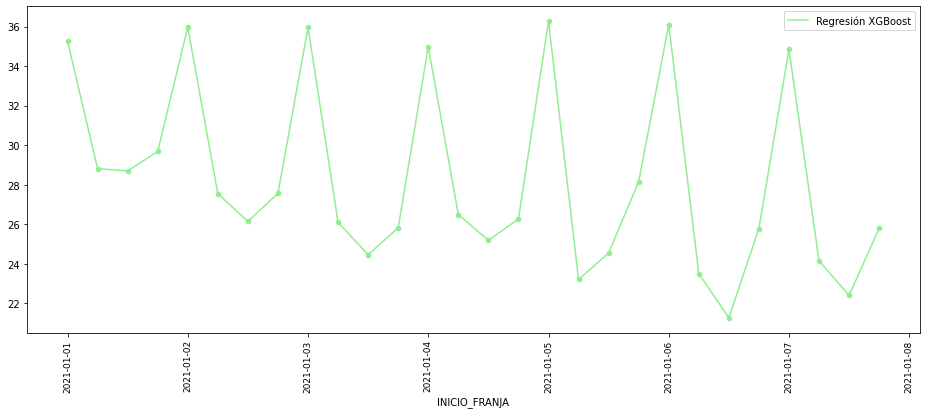

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90, fontsize=9)
sns.scatterplot(x=mock_dataset.index,y=predictions_mock,color='lightgreen',legend='auto')
sns.lineplot(x=mock_dataset.index,y=predictions_mock,color='lightgreen',legend='auto',label='Regresión XGBoost')

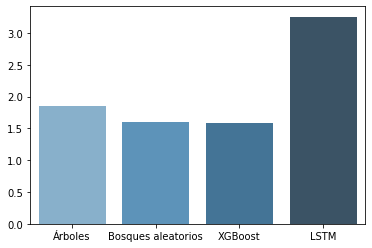

In [6]:
import seaborn as sns
data_mae =[1.8454,1.5968,1.5837,3.2573]

labels_mae =['Árboles','Bosques aleatorios','XGBoost','LSTM']
sns.barplot(x=labels_mae,y=data_mae,palette="Blues_d")

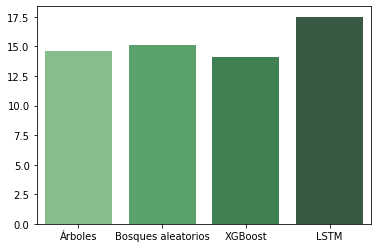

In [8]:

import seaborn as sns
data_mae =[14.6018,15.1103,14.1062,17.5106]

labels_mae =['Árboles','Bosques aleatorios','XGBoost','LSTM']
sns.barplot(x=labels_mae,y=data_mae,palette="Greens_d")